# 1.2 Macroeconomic data

## 1.2.1 Exchange rate CAD/USD

The data was downloaded from https://fred.stlouisfed.org/. 
The purpose of this exercise is to test for normality of the exchange rate time series. Then to test the random walk hypothesis using: autocorrelation coefficients test, Portmanteau test, variance ratios and the unit root test Augmented Dickey-Fuller (ADF). For ADF, we need to consider test levels of 1%, 5% and 10%.

### Step 1: Data Loading and Pre-Processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#read the data and set the DATE column as index
exchange_rate = pd.read_csv("DEXCAUS.csv",parse_dates=["DATE"])
exchange_rate.DATE = pd.to_datetime(exchange_rate.DATE)
exchange_rate.set_index("DATE",inplace=True)
exchange_rate = exchange_rate.rename(columns={"DEXCAUS":"Exchange Rate"})
exchange_rate

,Exchange Rate
DATE,
1971-01-04,1.0109
1971-01-05,1.0102
1971-01-06,1.0106
1971-01-07,1.0148
1971-01-08,1.0154
...,...
2021-09-06,.
2021-09-07,1.2622
2021-09-08,1.2681


In [3]:
exchange_rate.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13225 entries, 1971-01-04 to 2021-09-10
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Exchange Rate  13225 non-null  object
dtypes: object(1)
memory usage: 206.6+ KB


By examining the data, we noticed that the Exchange Rate column's data type is object, thus the first step is to convert the object type to numeric type. Prior to complete this task, we also noticed that some row values were filled with only a dot. In this regard, it is also necessary to remove these missing values.

In [4]:
#remove the row values of dot
numeric = exchange_rate["Exchange Rate"] != "."
exchange_rate = exchange_rate[numeric]
exchange_rate

,Exchange Rate
DATE,
1971-01-04,1.0109
1971-01-05,1.0102
1971-01-06,1.0106
1971-01-07,1.0148
1971-01-08,1.0154
...,...
2021-09-03,1.2524
2021-09-07,1.2622
2021-09-08,1.2681


In [5]:
#convert the datatype from object to numeric
exchange_rate["Exchange Rate"] = pd.to_numeric(exchange_rate["Exchange Rate"])
exchange_rate

,Exchange Rate
DATE,
1971-01-04,1.0109
1971-01-05,1.0102
1971-01-06,1.0106
1971-01-07,1.0148
1971-01-08,1.0154
...,...
2021-09-03,1.2524
2021-09-07,1.2622
2021-09-08,1.2681


In [6]:
exchange_rate.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12722 entries, 1971-01-04 to 2021-09-10
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Exchange Rate  12722 non-null  float64
dtypes: float64(1)
memory usage: 198.8 KB


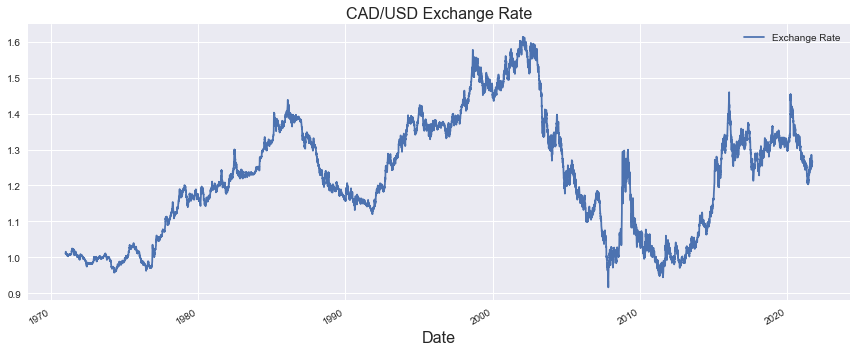

In [7]:
#plot the data
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn')
#mpl.rcParams['font.family'] = 'serif'
%matplotlib inline
exchange_rate.plot(figsize=(12,5));
plt.title("CAD/USD Exchange Rate",fontsize=16)
plt.xlabel("Date",fontsize=16)
plt.tight_layout();

After the data cleaning step, we calculated the difference of logs. Although the exchange rate value was not completely continous, given the variation over the segment of missing value days are not that significant, we still use the common method to calculate the log returns, which is the following equation:

* Simple net return:
\begin{align}
R_t=\frac{P_t}{P_t-1}-1
\end{align}

* Log Returns:
\begin{align}
r_t=log(1+R_t)
\end{align}

In [8]:
return_data = exchange_rate.pct_change()
return_data = return_data.rename(columns={"Exchange Rate":"Simple Net Return"})
return_data["Log Returns"] = np.log(return_data["Simple Net Return"] + 1)
return_data

,Simple Net Return,Log Returns
DATE,,
1971-01-04,NaN,NaN
1971-01-05,-0.000692,-0.000693
1971-01-06,0.000396,0.000396
1971-01-07,0.004156,0.004147
1971-01-08,0.000591,0.000591
...,...,...
2021-09-03,-0.002787,-0.002791
2021-09-07,0.007825,0.007795
2021-09-08,0.004674,0.004663


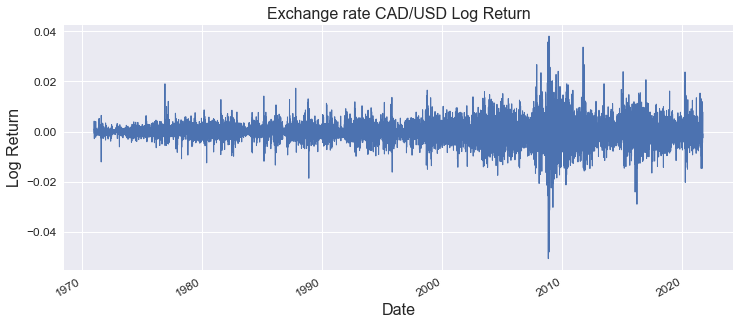

In [9]:
# plot the return series
ax = return_data["Log Returns"][1:].plot(figsize=(12,5),fontsize=12,linewidth=1)
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('Log Return', fontsize=16)
ax.set_title('Exchange rate CAD/USD Log Return', fontsize=16);

### Step 2: Test for normality

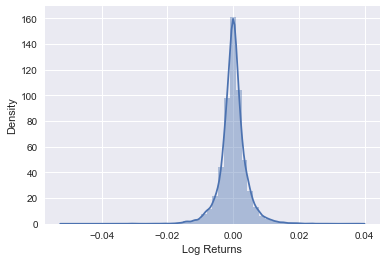

In [10]:
# plot the distribution and kde estimate of the exchange rate return series
sns.distplot(return_data["Log Returns"][1:]);

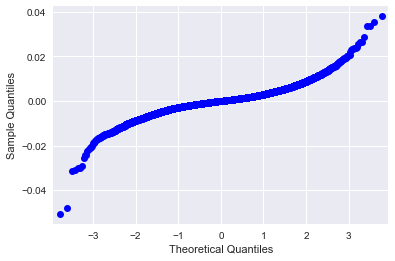

In [11]:
# QQ plot of the exchange rate return series
fig = sm.qqplot(return_data["Log Returns"][1:]);
plt.show();

#### 1. Jarque-Bera test

In [12]:
from scipy import stats
jarque_bera_test = stats.jarque_bera(return_data["Log Returns"][1:])
jarque_bera_test

Jarque_beraResult(statistic=51799.88762652437, pvalue=0.0)

The Jarque-Bera test results (i.e., small p-value) indicated that we should reject the null hypothesis that the CPI log return time series has the skewness and kurtosis matching a normal distribution.

### Step 3: Test the random walk hypothesis

#### 1. Autocorrelation Coefficients test

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

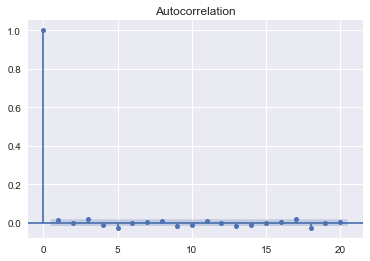

In [14]:
plot_acf(return_data['Log Returns'][1:], alpha=0.05, lags=20)
plt.show()

Because the autocorrelation coefficients of the exchange rate return series are not significant, thus, we don't have strong evidence to reject the hypothesis that the CAD/USD exchange rate time series is a random walk (i.e., under the null hypothesis of random walk for the exchange rate time sereis, the serial correlation of the return series are not significant, and this is the case here).

#### 2. Portmanteau test

In time series analysis, one well-known version of a portmanteau test is available for testing for autocorrelation in the residuals of a model: it tests whether any of a group of autocorrelations of the residual time series are different from zero. This test is the Ljung-Box test.

In [15]:
from statsmodels.stats.diagnostic import acorr_ljungbox
result = acorr_ljungbox(return_data["Log Returns"][1:],lags = 20,return_df=True)
result

,lb_stat,lb_pvalue
1,1.668848,0.196413
2,1.762526,0.414259
3,5.485129,0.139531
4,6.785206,0.147684
5,16.354545,0.005901
6,16.543060,0.011118
7,16.817034,0.018615
8,17.538966,0.024961
9,21.166147,0.011933
10,22.862379,0.011266


The null hypothesis of the Portmanteau test is that all the autocorrelation coefficients are zero. If the return series autocorrelation is zero, the exchange rate time series is random walk. Considering a 5% confidence level, it is clear that we can not reject this null hypothesis (autocorrelation coefficients are zero) for the first 4 lags, however, starting from lag 5, we can reject the null hypothesis (autocorrelation coefficients are zero). 

#### 3. Variance Ratio Test

Variance ratio tests are not usually used as unit root tests, and are instead used for testing whether a financial return series is a pure random walk versus having some predictability.

In [16]:
from arch.unitroot import VarianceRatio

vr = VarianceRatio(return_data["Log Returns"][1:],20)
vr.summary()

Test Statistic,-11.378
P-value,0.000
Lags,20


The variance ratio test result indicated that we should reject the null hypothesis that the exchange rate return time sereis is a pure random walk.

#### 4. Unito Root Test Augmented Dickey-Fuller (ADF) Test

In [17]:
from statsmodels.tsa.stattools import adfuller
results = adfuller(return_data["Log Returns"][1:])
print('ADF Statistic: %f' % results[0])
print('p-value is', results[1])
print('Critical Values:')
for key, value in results[4].items():
    print('\t%s: %.3f' % (key,value))

ADF Statistic: -16.829940
p-value is 1.160131978326247e-29
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


Based on the result above, we can see that the ADF test statistic is smaller than all the critical values at 1%, 5% and 10% and the p-value of the test is extremely small. This suggests that we can reject the null hypothesis (there is unit root) at all these confidence levels. If the exchange rate return time series data is stationary, we can conclude that the exchange rate time series is a random walk.

## 1.2.2 Consumer price index

The data was downloaded from https://fred.stlouisfed.org/. 
The purpose of this exercise is to test for normality of the consumer price index return time series. Then to test the random walk hypothesis using: autocorrelation coefficients test, Portmanteau test, variance ratios and the unit root test Augmented Dickey-Fuller (ADF). For ADF, wo need to consider test levels of 1%, 5% and 10%.

### Step 1: Data Loading and Pre-Processing

In [18]:
#read the data and set the DATE column as index
CPI_data = pd.read_csv("CPIAUCSL.csv",parse_dates=["DATE"])
CPI_data.DATE = pd.to_datetime(CPI_data.DATE)
CPI_data.set_index("DATE",inplace=True)
CPI_data = CPI_data.rename(columns={"CPIAUCSL":"Consumer Price Index (monthly)"})
CPI_data

,Consumer Price Index (monthly)
DATE,
1947-01-01,21.480
1947-02-01,21.620
1947-03-01,22.000
1947-04-01,22.000
1947-05-01,21.950
...,...
2021-04-01,266.832
2021-05-01,268.551
2021-06-01,270.981


In [19]:
CPI_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 896 entries, 1947-01-01 to 2021-08-01
Data columns (total 1 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Consumer Price Index (monthly)  896 non-null    float64
dtypes: float64(1)
memory usage: 14.0 KB


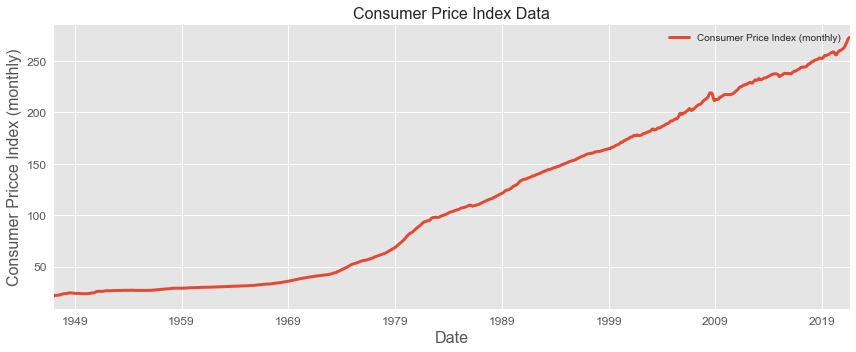

In [20]:
# plot the CPI raw data
plt.style.use('ggplot')
ax = CPI_data.plot(figsize=(12,5), fontsize=12, linewidth=3);
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('Consumer Pricce Index (monthly)', fontsize=16)
ax.set_title('Consumer Price Index Data', fontsize=16)
plt.tight_layout();

In [21]:
# calculate the log return series of the CPI raw data
CPI_return = CPI_data.pct_change()
CPI_return = CPI_return.rename(columns={"Consumer Price Index (monthly)":"CPI Simple Net Return"})
CPI_return["CPI Log Returns"] = np.log(CPI_return["CPI Simple Net Return"] + 1)
CPI_return

,CPI Simple Net Return,CPI Log Returns
DATE,,
1947-01-01,NaN,NaN
1947-02-01,0.006518,0.006497
1947-03-01,0.017576,0.017424
1947-04-01,0.000000,0.000000
1947-05-01,-0.002273,-0.002275
...,...,...
2021-04-01,0.007700,0.007671
2021-05-01,0.006442,0.006422
2021-06-01,0.009049,0.009008


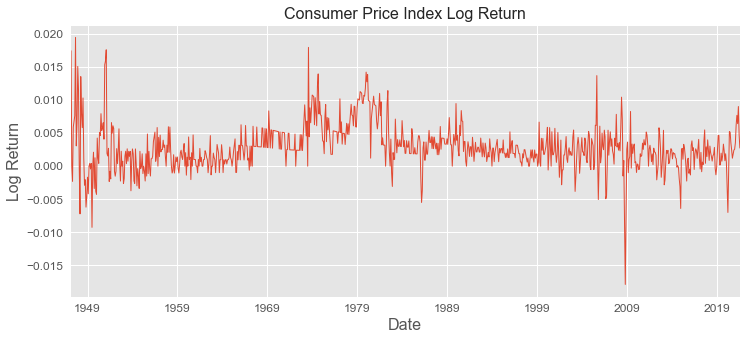

In [22]:
# plot the CPI return series
ax = CPI_return["CPI Log Returns"][1:].plot(figsize=(12,5),fontsize=12,linewidth=1)
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('Log Return', fontsize=16)
ax.set_title('Consumer Price Index Log Return', fontsize=16);

### Step 2: Test for normality

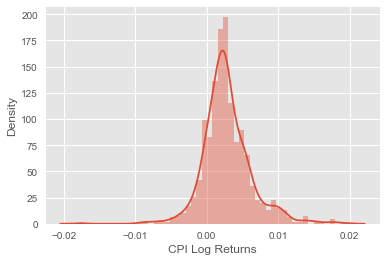

In [23]:
# plot the CPI log return emperical distribution and kde estimate
sns.distplot(CPI_return["CPI Log Returns"][1:]);

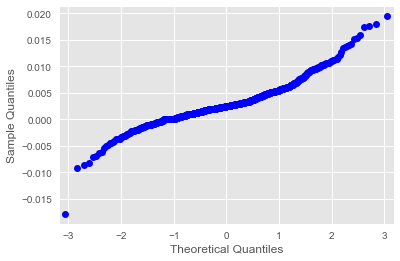

In [24]:
# plot the QQ-plot of the CPI log return series
fig = sm.qqplot(CPI_return["CPI Log Returns"][1:]);
plt.show();

#### 1. Jarque-Bera test

In [25]:
jarque_bera_test = stats.jarque_bera(CPI_return["CPI Log Returns"][1:])
jarque_bera_test

Jarque_beraResult(statistic=678.9685929582004, pvalue=0.0)

The Jarque-Bera test results (i.e., small p-value) indicated that we should reject the null hypothesis that the CPI log return time series has the skewness and kurtosis matching a normal distribution.

### Step 3: Test the random walk hypothesis

#### 1. Autocorrelation Coefficients test

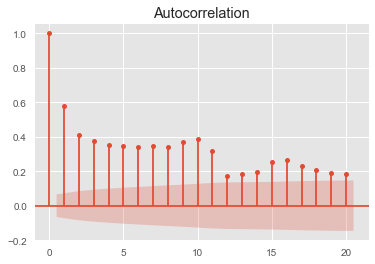

In [26]:
plot_acf(CPI_return['CPI Log Returns'][1:], alpha=0.05, lags=20)
plt.show()

The ACF plot indicates that the autocorrelation coefficients for the CPI log return time series are quite significant, thus the CPI log return time series is nonstationry and could be a random walk process.

#### 2. Portmanteau test

In [27]:
result = acorr_ljungbox(CPI_return['CPI Log Returns'][1:],lags = 20,return_df=True)
result

,lb_stat,lb_pvalue
1,299.343244,4.579909e-67
2,450.002039,1.919989e-98
3,575.573889,1.988206e-124
4,688.261312,1.213217e-147
5,796.023726,8.384702e-170
6,901.353876,1.914788e-191
7,1010.625113,6.095634e-214
8,1114.455941,2.892378e-235
9,1239.128374,4.323213e-261
10,1373.300881,5.764582e-289


The null hypothesis of the Portmanteau test is that all the autocorrelation coefficients are zero. Considering a 5% confidence level, it is clear that we can reject this null hypothesis for the first 20 lags. This Portmanteau test result also agrees with the ACF plot indicating that this CPI return time series has significant serial correlations. Thus, we cannot reject the hypothesis that this CPI return series is a random walk.

#### 3. Variance Ratio Test

Variance ratio tests are not usually used as unit root tests, and are instead used for testing whether a financial return series is a pure random walk versus having some predictability.

In [28]:
vr = VarianceRatio(CPI_return['CPI Log Returns'][1:],20)
vr.summary()

Test Statistic,-3.561
P-value,0.000
Lags,20


The variance ratio test result indicated that we should reject the null hypothesis that the CPI return time sereis is a pure random walk.

#### 4. Unito Root Test Augmented Dickey-Fuller (ADF) Test

In [29]:
results = adfuller(CPI_return['CPI Log Returns'][1:])
print('ADF Statistic: %f' % results[0])
print('p-value is', results[1])
print('Critical Values:')
for key, value in results[4].items():
    print('\t%s: %.3f' % (key,value))

ADF Statistic: -4.430737
p-value is 0.00026178112602147027
Critical Values:
	1%: -3.438
	5%: -2.865
	10%: -2.569


Based on the result above, we can see that the ADF test statistic is smaller than all the critical values at 1%, 5% and 10% and the p-value is also very small. This suggests that we can reject the null hypothesis (there is unit root) at all these confidence levels. 

## 1.2.3 Unemployment Rate

The data was downloaded from https://fred.stlouisfed.org/. 
The purpose of this exercise is to test for normality of the unemployment rate time series. Then to test the random walk hypothesis using: autocorrelation coefficients test, Portmanteau test, variance ratios and the unit root test Augmented Dickey-Fuller (ADF). For ADF, we need to consider test levels of 1%, 5% and 10%.

### Step 1: Data Loading and Pre-Processing

In [30]:
#read the data and set the DATE column as index
UN_data = pd.read_csv("UNRATE.csv",parse_dates=["DATE"])
UN_data.DATE = pd.to_datetime(UN_data.DATE)
UN_data.set_index("DATE",inplace=True)
UN_data = UN_data.rename(columns={"UNRATE":"Unemployment Rate"})
UN_data

,Unemployment Rate
DATE,
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5
...,...
2021-04-01,6.1
2021-05-01,5.8
2021-06-01,5.9


In [31]:
UN_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 884 entries, 1948-01-01 to 2021-08-01
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unemployment Rate  884 non-null    float64
dtypes: float64(1)
memory usage: 13.8 KB


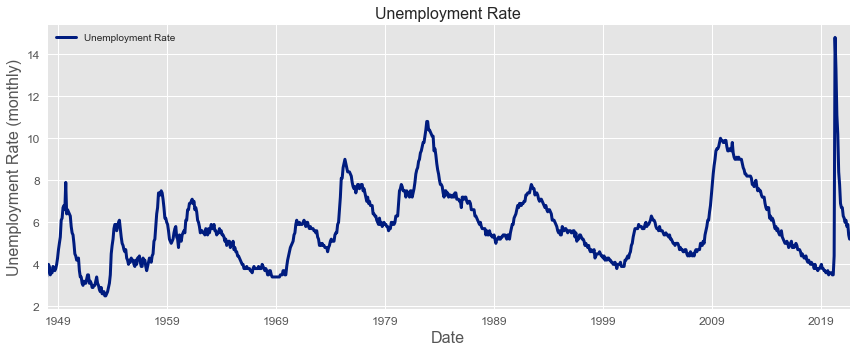

In [32]:
# plot the unemployment rate time series
plt.style.use('seaborn-dark-palette')
ax = UN_data.plot(figsize=(12,5), fontsize=12, linewidth=3);
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('Unemployment Rate (monthly)', fontsize=16)
ax.set_title('Unemployment Rate', fontsize=16)
plt.tight_layout();

### Step 2: Test for normality

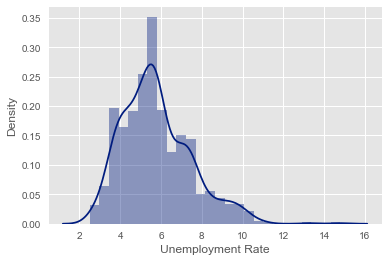

In [33]:
# plot the unemployment rate empirical distribution and kde estimate
sns.distplot(UN_data["Unemployment Rate"][1:]);

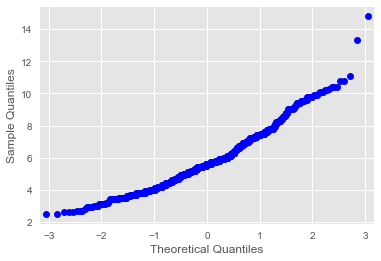

In [34]:
# plot the QQ plot of the unemployment rate time series
fig = sm.qqplot(UN_data["Unemployment Rate"]);
plt.show();


#### 1. Jarque-Bera test

In [35]:
jarque_bera_test = stats.jarque_bera(UN_data["Unemployment Rate"])
jarque_bera_test

Jarque_beraResult(statistic=149.3214955453599, pvalue=0.0)

The Jarque-Bera test results (i.e., small p-value) indicated that we should reject the null hypothesis that the Unemployment Rate time series has the skewness and kurtosis matching a normal distribution.

### Step 3: Test the random walk hypothesis

#### 1. Autocorrelation Coefficients test

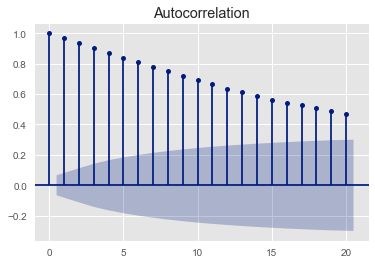

In [36]:
plot_acf(UN_data["Unemployment Rate"], alpha=0.05, lags=20)
plt.show()

The ACF plot indicates that the autocorrelation coefficients for the unemployment rate time series are quite significant, thus we cannot reject the hypothesis that the unemployment rate time series is a random walk.

#### 2. Portmanteau test

In [37]:
result = acorr_ljungbox(UN_data["Unemployment Rate"],lags = 20,return_df=True)
result

,lb_stat,lb_pvalue
1,830.471416,1.279911e-182
2,1603.483451,0.000000e+00
3,2325.122217,0.000000e+00
4,2996.254309,0.000000e+00
5,3623.451826,0.000000e+00
6,4206.632387,0.000000e+00
7,4749.572232,0.000000e+00
8,5254.518302,0.000000e+00
9,5720.581890,0.000000e+00
10,6149.723093,0.000000e+00


The null hypothesis of the Portmanteau test is that all the autocorrelation coefficients are zero. Considering a 5% confidence level, it is clear that we can reject this null hypothesis for the first 20 lags. This Portmanteau test result also agrees with the ACF plot indicating that this unemployment rate time series has significant serial correlations. Thus, we cannot reject the hypothesis that this unemployment rate time series is a random walk.

#### 3. Variance Ratio Test

Variance ratio tests are not usually used as unit root tests, and are instead used for testing whether a financial return series is a pure random walk versus having some predictability.

In [38]:
vr = VarianceRatio(UN_data["Unemployment Rate"],20)
vr.summary()

Test Statistic,-0.470
P-value,0.638
Lags,20


The variance test result indicated that we should not reject the null hypothesis that the Unemployement Rate time sereis is a pure random walk.

#### 4. Unito Root Test Augmented Dickey-Fuller (ADF) Test

In [39]:
results = adfuller(UN_data["Unemployment Rate"])
print('ADF Statistic: %f' % results[0])
print('p-value is', results[1])
print('Critical Values:')
for key, value in results[4].items():
    print('\t%s: %.3f' % (key,value))

ADF Statistic: -4.009541
p-value is 0.0013613692241531044
Critical Values:
	1%: -3.438
	5%: -2.865
	10%: -2.569


Based on the result above, we can see that the ADF test statistic is smaller than all the critical values at 1%, 5% and 10%. This suggests that we can reject the null hypothesis (there is unit root) at all these confidence levels. 

## 1.2.4 Federal Funds Rate

The data was downloaded from https://fred.stlouisfed.org/. 
The purpose of this exercise is to test for normality of the Federal Funds Rate time series. Then to test the random walk hypothesis using: autocorrelation coefficients test, Portmanteau test, variance ratios and the unit root test Augmented Dickey-Fuller (ADF). For ADF, we need to consider test levels of 1%, 5% and 10%.

### Step 1: Data Loading and Pre-Processing

In [40]:
#read the data and set the DATE column as index
FFR_data = pd.read_csv("FEDFUNDS.csv",parse_dates=["DATE"])
FFR_data.DATE = pd.to_datetime(FFR_data.DATE)
FFR_data.set_index("DATE",inplace=True)
FFR_data = FFR_data.rename(columns={"FEDFUNDS":"Federal Funds Rate"})
FFR_data

,Federal Funds Rate
DATE,
1954-07-01,0.80
1954-08-01,1.22
1954-09-01,1.07
1954-10-01,0.85
1954-11-01,0.83
...,...
2021-04-01,0.07
2021-05-01,0.06
2021-06-01,0.08


In [41]:
FFR_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 806 entries, 1954-07-01 to 2021-08-01
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Federal Funds Rate  806 non-null    float64
dtypes: float64(1)
memory usage: 12.6 KB


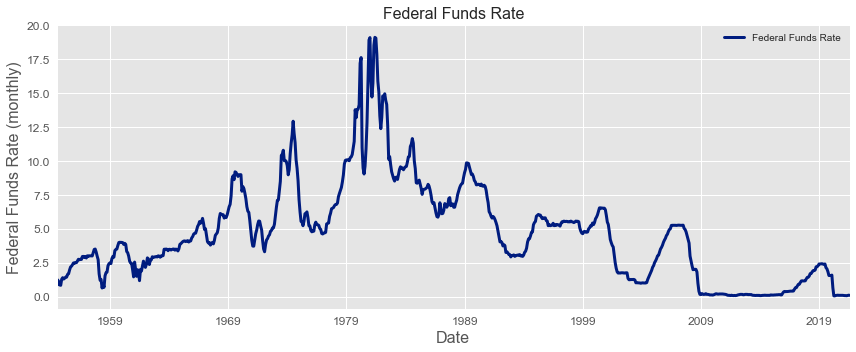

In [42]:
# plot the Federal Funds Rate time series
plt.style.use('seaborn-notebook')
ax = FFR_data.plot(figsize=(12,5), fontsize=12, linewidth=3);
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('Federal Funds Rate (monthly)', fontsize=16)
ax.set_title('Federal Funds Rate', fontsize=16)
plt.tight_layout();

### Step 2: Test for normality

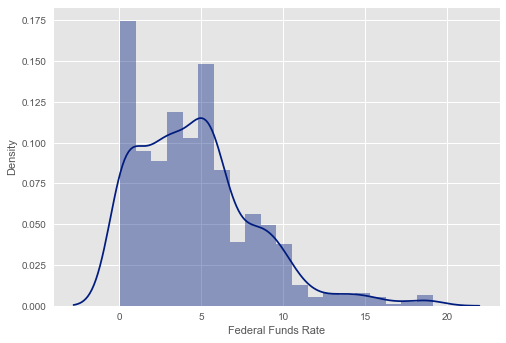

In [43]:
# plot the empirical distribution of the Federal Funds Rate and kde estimate
sns.distplot(FFR_data["Federal Funds Rate"]);

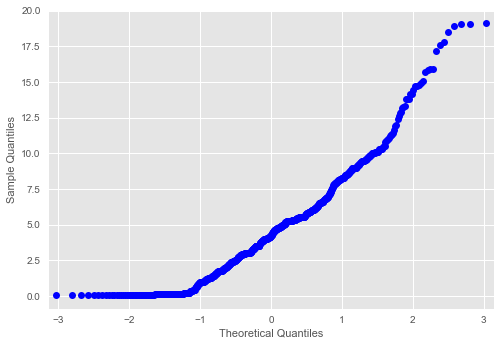

In [44]:
# plot the QQ-plot of the Federal Funds Rate time series data
fig = sm.qqplot(FFR_data["Federal Funds Rate"]);
plt.show();

#### 1. Jarque-Bera test

In [45]:
jarque_bera_test = stats.jarque_bera(FFR_data["Federal Funds Rate"])
jarque_bera_test

Jarque_beraResult(statistic=224.8444348161465, pvalue=0.0)

The Jarque-Bera test results (i.e., small p-value) indicated that we should reject the null hypothesis that the Federal Funds Rate time series has the skewness and kurtosis matching a normal distribution.

### Step 3: Test the random walk hypothesis

#### 1. Autocorrelation Coefficients test

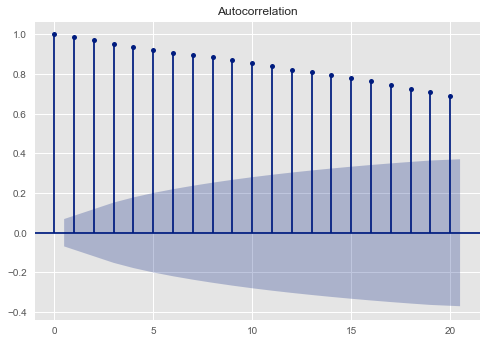

In [46]:
plot_acf(FFR_data["Federal Funds Rate"], alpha=0.05, lags=20)
plt.show()

The ACF plot indicates that the autocorrelation coefficients for the unemployment rate time series are quite significant, thus we cannot reject the hypothesis that the Federal Funds Rate time series is a random walk.

#### 2. Portmanteau test

In [47]:
result = acorr_ljungbox(FFR_data["Federal Funds Rate"],lags = 20,return_df=True)
result

,lb_stat,lb_pvalue
1,791.335857,4.128711e-174
2,1555.216273,0.000000e+00
3,2291.646360,0.000000e+00
4,3003.088285,0.000000e+00
5,3693.187018,0.000000e+00
6,4364.395751,0.000000e+00
7,5018.419724,0.000000e+00
8,5657.785819,0.000000e+00
9,6279.716325,0.000000e+00
10,6878.952657,0.000000e+00


The null hypothesis of the Portmanteau test is that all the autocorrelation coefficients are zero. Considering a 5% confidence level, it is clear that we can reject this null hypothesis for the first 20 lags. This Portmanteau test result also agrees with the ACF plot indicating that this federal funds rate time series has significant serial correlations. Thus, we cannot reject the hypothesis that this unemployment rate time series is a random walk.

#### 3. Variance Ratio Test

Variance ratio tests are not usually used as unit root tests, and are instead used for testing whether a financial return series is a pure random walk versus having some predictability.

In [48]:
vr = VarianceRatio(FFR_data["Federal Funds Rate"],20)
vr.summary()

Test Statistic,1.142
P-value,0.253
Lags,20


The variance test result indicated that we should not reject the null hypothesis that the Federal Fund Rate time sereis is a pure random walk.

#### 4. Unito Root Test Augmented Dickey-Fuller (ADF) Test

In [49]:
results = adfuller(FFR_data["Federal Funds Rate"])
print('ADF Statistic: %f' % results[0])
print('p-value is', results[1])
print('Critical Values:')
for key, value in results[4].items():
    print('\t%s: %.3f' % (key,value))

ADF Statistic: -2.668957
p-value is 0.07956578947426962
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569


Based on the result above, we can see that the ADF test statistic is larger than the critical values at 1% and 5%, but smaller than the critical value at 10%. This suggests that we cannot reject the null hypothesis (there is unit root) at 1% and 5% confidence levels, but can reject the null hypothesis at 10% confidence level. 